In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data = data.drop('CustomerID', axis=1)

In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)
data['Cluster'] = clusters

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


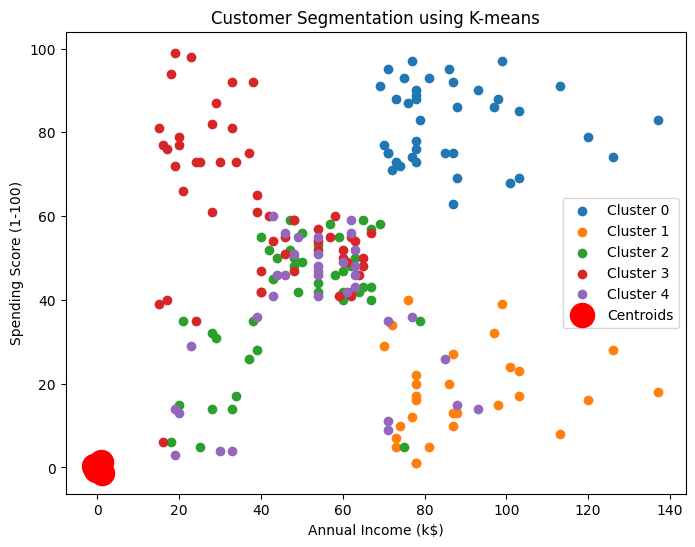

In [17]:

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(data.loc[clusters == i, 'Annual Income (k$)'], 
                data.loc[clusters == i, 'Spending Score (1-100)'], 
                label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation using K-means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [20]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  
cluster_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1]) 
cluster_df['Cluster'] = range(k)  
print("Cluster Centers:")
print(cluster_df)


Cluster Centers:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  0.538462  32.692308           86.538462               82.128205        0
1  0.551724  36.482759           89.517241               18.000000        1
2  1.000000  49.813953           49.232558               40.069767        2
3  0.592593  24.907407           39.722222               61.203704        3
4  0.000000  55.714286           53.685714               36.771429        4


<class 'NameError'>: name 'cluster_center' is not defined